回归是估计输入与连续值输出数据之间关系的过程。  
线性回归的目标是提取输入变量与输出变量的关联线性模型，这就要求实际输出与线性方程预测的输出的残差平方和最小化。这种方法被称为普通最小二乘法。

In [1]:
import sys
import numpy as np
#filename = sys.args[1]
filename = "data_singlevar.txt"
X = []
y = []
with open(filename, 'r') as f:
    for line in f.readlines():
        xt, yt = [float(i) for i in line.split(',')]
        X.append(xt)
        y.append(yt)

In [2]:
num_training = int(0.8*len(X))
num_test = len(X) - num_training
# 训练数据
X_train = np.array(X[:num_training]).reshape((num_training,1))
y_train = np.array(y[:num_training])

#测试数据
X_test = np.array(X[num_training:]).reshape((num_test, 1))
y_test = np.array(y[num_training:])

In [3]:
# 创建一个回归器
from sklearn import linear_model

# 创建线性回归对象
linear_regressor = linear_model.LinearRegression()

linear_regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

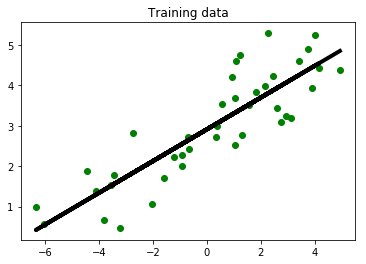

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

y_train_pred = linear_regressor.predict(X_train)
plt.figure()
plt.scatter(X_train, y_train,color='green')
plt.plot(X_train, y_train_pred, color='black',linewidth=4)
plt.title("Training data")
plt.show()

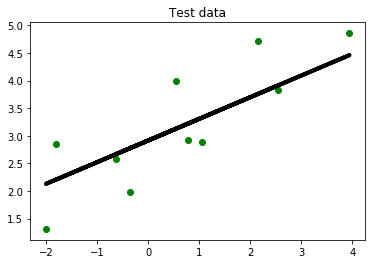

In [5]:
y_test_pred = linear_regressor.predict(X_test)
plt.figure()
plt.scatter(X_test, y_test,color='green')
plt.plot(X_test, y_test_pred, color='black',linewidth=4)
plt.title("Test data")
plt.show()

在模型评价的相关内容中，用误差表示实际值与模型预测值之间的差值。  
* 平均绝对误差(mean absolute error)：给定数据集的所有数据点的绝对误差平均值
* 均方误差（Mean squred error）:给定数据集的所有数据点的误差的平方的平均值  
* 中位数绝对误差（median absolute error）：这是给定数据集的所有数据点的误差的中位数，主要用来消除异常值的干扰  
* 解释方差分
* R方得分

In [6]:
import sklearn.metrics as sm

In [7]:
print("Mean absolute error:",round(sm.mean_absolute_error(y_test, y_test_pred), 2))
print("Mean squred error:", round(sm.mean_squared_error(y_test, y_test_pred), 2))
print("Median absolute error: ",round(sm.median_absolute_error(y_test, y_test_pred), 2))
print("Explained variance score:", round(sm.explained_variance_score(y_test, y_test_pred), 2))
print("R2 score:", round(sm.r2_score(y_test, y_test_pred),2))

Mean absolute error: 0.54
Mean squred error: 0.38
Median absolute error:  0.54
Explained variance score: 0.68
R2 score: 0.68


>每个指标都面面俱到是非常难的，因此只选择一两个指标来衡量模型效果。通常做法是尽量保证均方误差最低，而且解释方差最高。

In [11]:
# 保存模型
import pickle
output_model_file = 'saved_model.pkl'
with open(output_model_file, 'wb') as f:
    pickle.dump(linear_regressor, f)

In [13]:
# 读取模型
with open(output_model_file, 'rb') as f:
    model_linearead = pickle.load(f)
    
y_test_predict = model_linearead.predict(X_test)
print("Mean absolute error:",round(sm.mean_absolute_error(y_test, y_test_predict), 2))

Mean absolute error: 0.54
